In [3]:
!pip install twint

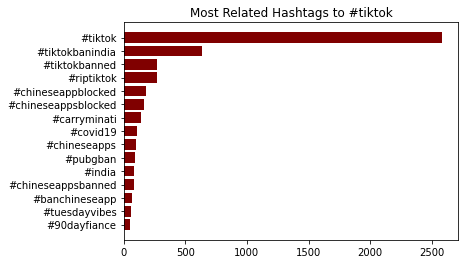

List of most related hashtags to #tiktok :
['#tiktok', '#tiktokbanindia', '#tiktokbanned', '#riptiktok', '#chineseappblocked', '#chineseappsblocked', '#carryminati', '#covid19', '#chineseapps', '#pubgban', '#india', '#chineseappsbanned', '#banchineseapp', '#tuesdayvibes', '#90dayfiance']


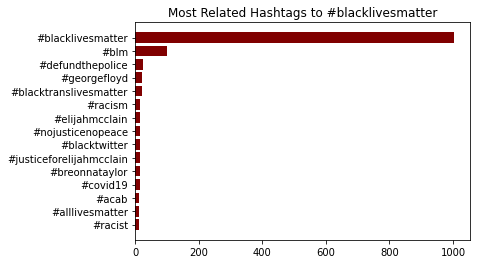

List of most related hashtags to #blacklivesmatter :
['#blacklivesmatter', '#blm', '#defundthepolice', '#georgefloyd', '#blacktranslivesmatter', '#racism', '#elijahmcclain', '#nojusticenopeace', '#blacktwitter', '#justiceforelijahmcclain', '#breonnataylor', '#covid19', '#acab', '#alllivesmatter', '#racist']


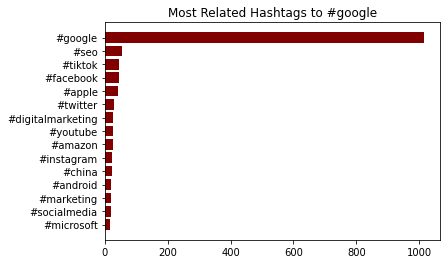

List of most related hashtags to #google :
['#google', '#seo', '#tiktok', '#facebook', '#apple', '#twitter', '#digitalmarketing', '#youtube', '#amazon', '#instagram', '#china', '#android', '#marketing', '#socialmedia', '#microsoft']


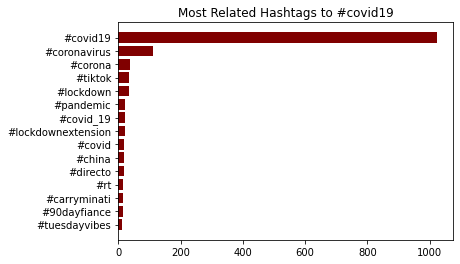

List of most related hashtags to #covid19 :
['#covid19', '#coronavirus', '#corona', '#tiktok', '#lockdown', '#pandemic', '#covid_19', '#lockdownextension', '#covid', '#china', '#directo', '#rt', '#carryminati', '#90dayfiance', '#tuesdayvibes']


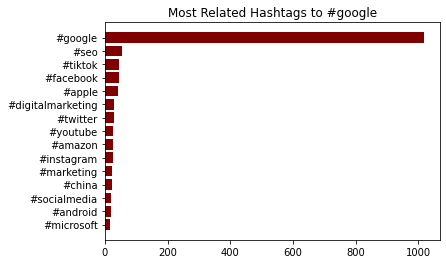

List of most related hashtags to #google :
['#google', '#seo', '#tiktok', '#facebook', '#apple', '#digitalmarketing', '#twitter', '#youtube', '#amazon', '#instagram', '#marketing', '#china', '#socialmedia', '#android', '#microsoft']


In [4]:
import twint
import heapq
import matplotlib.pyplot as plt
def get_similar_hashtags(seed_hashtag, limit):
  c = twint.Config()
  c.Hide_output = True  # makes the command line less noisy
  c.Limit = limit  # maximum number of tweets to pull per account
  c.Store_object = True
  c.Search = seed_hashtag
  twint.run.Search(c)
  tweets = twint.output.tweets_list
  # counts occurrence of hashtags
  hashtags_dict = {}
  for tweet in tweets:
    for hashtag in tweet.hashtags:
      if hashtag in hashtags_dict:
        hashtags_dict[hashtag] += 1
      else:
        hashtags_dict[hashtag] = 1
  # del hashtags_dict[seed_hashtag] #gets rid of seed hashtag
  top_hashtags = heapq.nlargest(15, hashtags_dict, key=hashtags_dict.get)  # gets highest hashtags

  # makes dictionary of just highest ones
  hashtags_ranked = {}
  for hashtag in top_hashtags:
    hashtags_ranked[hashtag] = hashtags_dict[hashtag]
  plt.barh(range(len(hashtags_ranked)), list(hashtags_ranked.values()), align='center', color='maroon')
  plt.yticks(range(len(hashtags_ranked)), list(hashtags_ranked.keys()))
  plt.gca().invert_yaxis()  # just to have the highest bar at the top
  plt.title("Most Related Hashtags to " + seed_hashtag)
  plt.savefig(seed_hashtag + '.png', bbox_inches='tight')
  plt.savefig(seed_hashtag + '.pdf', bbox_inches='tight')
  plt.show()
  print("List of most related hashtags to "+ seed_hashtag + " :")
  print(top_hashtags)
  plt.close()
  twint.output.tweets_list = []

def main():
  seed_hashtags =["#tiktok", "#blacklivesmatter", "#google", "#covid19", "#cyber"]
  limit = 1000  # limits the number of tweets to pull
  for seed_hashtag in seed_hashtags:
    get_similar_hashtags(seed_hashtag, limit)
main()